Lets use the data set for creating the clusters so we can analyze the ralation and patters that repeats trought the  data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'data/healthcare-dataset-stroke-data.csv'

dataframe = pd.read_csv(path)
dataframe.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Our data set is contation numerical and categorical values, so to use the clustering algorithm for this data set , i'll try the K-prototype .   
This algorithm handles mixed data, it's combines the euclidian distance function and Hamming Dissimularity. For Hamming dissimularity we can make the parameters like work type, smoking status convert to binary parameters.   
Loss Function is Euclidian distance and number mismatches.

How the distance calculated between centroid and the data:   
distance(x,p) = Sum of (x_j -p_j)^2 + gamma sum of lambda(xj,pj)   
lambda(xj,pj) is 1 if there mismathc and 0 is the same value.   
gamma is weighted factor.

Also i'm going to try DBSCAN.
But first i'm going to perform pre-processing to data. I'll use only numerical parameters like age,avg_glucose_level and bmi.   
First handling the missing values by using the mean of the valuse of the same age range.

In [3]:
cp_dataframe = dataframe.copy()
cp_dataframe = dataframe.drop(axis=1,columns="id")

In [4]:
bins = [0, 30, 50, 82]
labels = [ 1, 2, 3]

cp_dataframe['age_group'] = pd.cut(cp_dataframe['age'],bins = bins,labels = labels,right=True)

In [5]:
#filling the missing values for bmi parameter
bmi_mean_by_age = cp_dataframe.groupby('age_group')['bmi'].mean().to_dict()
for key,val in bmi_mean_by_age.items():
    mask = (cp_dataframe['age_group'] == key) & (cp_dataframe['bmi'].isna())
    cp_dataframe.loc[mask,'bmi'] = val
    
cp_dataframe['bmi'] = cp_dataframe['bmi'].round(2)

/var/folders/28/pmh07v693dn2c3l0jdz5zvlw0000gn/T/ipykernel_19781/2774048401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_mean_by_age = cp_dataframe.groupby('age_group')['bmi'].mean().to_dict()


In [6]:
cp_dataframe = cp_dataframe.drop(axis=1,columns='age_group')
categorical_cols = cp_dataframe.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(cp_dataframe,columns=categorical_cols,dtype='float')
df_encoded['hypertension'] = df_encoded['hypertension'].astype(float)
df_encoded['heart_disease'] = df_encoded['heart_disease'].astype(float)
data = df_encoded
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.60,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,30.67,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.50,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.40,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.00,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,83.75,30.67,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,81.0,0.0,0.0,125.20,40.00,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,35.0,0.0,0.0,82.99,30.60,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0.0,0.0,166.29,25.60,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

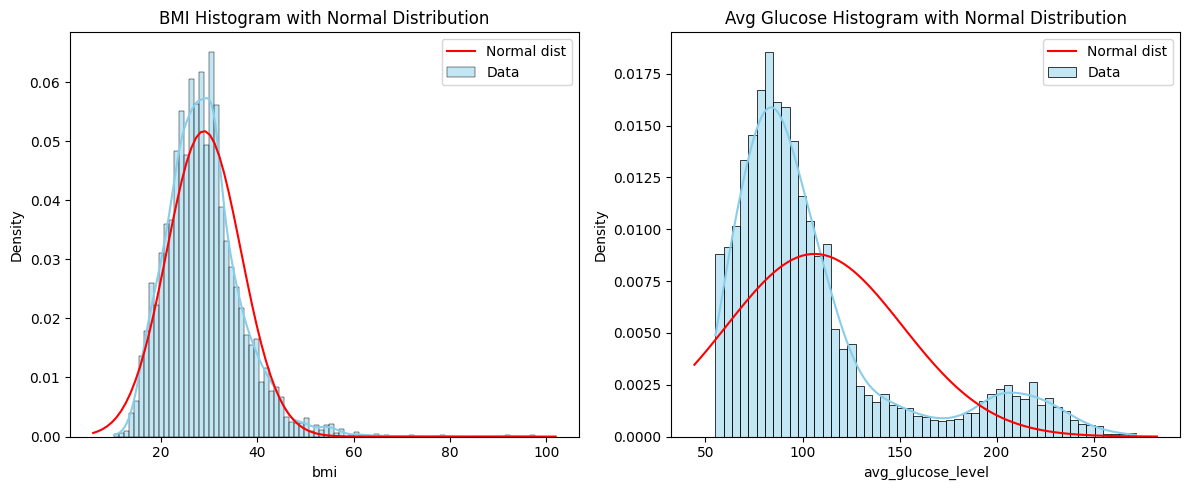

In [8]:
#let's normalaize  the values ,first let's check if tt's normal distributed to know which scaling method to use

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Plot 1: BMI
sns.histplot(data['bmi'], kde=True, stat="density", color='skyblue', ax=axes[0], label='Data')
mean_bmi  = data['bmi'].mean()
std_bmi = data['bmi'].std()

xmin_0, xmax_0 = axes[0].get_xlim()
x_0 = np.linspace(xmin_0, xmax_0, 100)
p_0 = norm.pdf(x_0, mean_bmi, std_bmi)
axes[0].plot(x_0, p_0, 'r', label='Normal dist')
axes[0].legend()
axes[0].set_title('BMI Histogram with Normal Distribution')

# Plot 2: Avg Glucose
sns.histplot(data['avg_glucose_level'], kde=True, stat="density", color='skyblue', ax=axes[1], label='Data')
mean = data['avg_glucose_level'].mean()
std = data['avg_glucose_level'].std()

xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
axes[1].plot(x, p, 'r', label='Normal dist')
axes[1].legend()
axes[1].set_title('Avg Glucose Histogram with Normal Distribution')

plt.tight_layout()
plt.show()

We can see that BMI parameter is almost in standart normal distribution it has the bell shape. so for this feature we will use the Standart Scaler, and for the average glucose parameter i'll try the MinMax Scaler.

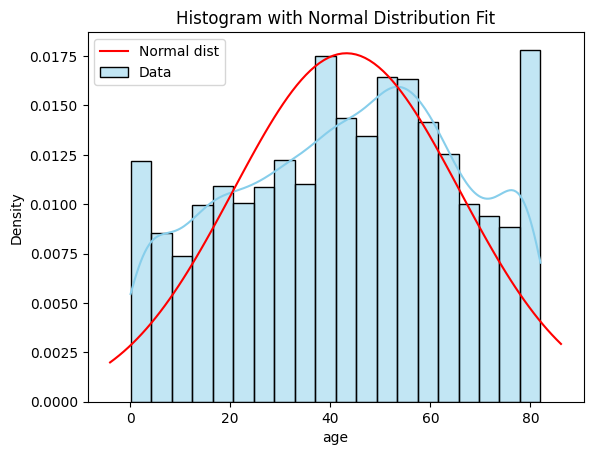

In [9]:
sns.histplot(data['age'], kde=True, stat="density", color='skyblue', label='Data')
mean = data['age'].mean()
std = data['age'].std()

# Overlay normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', label='Normal dist')
plt.legend()
plt.title('Histogram with Normal Distribution Fit')
plt.show()

For the age parameter will be used the Min-Max Scaler as well.

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


data['age'] = StandardScaler().fit_transform(data['age'].values.reshape(-1, 1))
data['avg_glucose_level'] = MinMaxScaler().fit_transform(data['avg_glucose_level'].values.reshape(-1, 1))
data['bmi']= StandardScaler().fit_transform(data['bmi'].values.reshape(-1, 1))

In [11]:
new_data = data[['bmi','avg_glucose_level','age','hypertension','heart_disease']]
new_data

,bmi,avg_glucose_level,age,hypertension,heart_disease
0,0.994544,0.801265,1.051434,0.0,1.0
1,0.225840,0.679023,0.786070,0.0,0.0
2,0.463062,0.234512,1.626390,0.0,1.0
3,0.709359,0.536008,0.255342,0.0,0.0
4,-0.638789,0.549349,1.582163,1.0,0.0
...,...,...,...,...,...
5105,0.225840,0.132167,1.626390,1.0,0.0
5106,1.435284,0.323516,1.670617,0.0,0.0
5107,0.216766,0.128658,-0.363842,0.0,0.0
5108,-0.431382,0.513203,0.343796,0.0,0.0


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Range of k values to try
k_values = range(2, 11)  # e.g., try k = 2 to 10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(new_data)
    score = silhouette_score(new_data, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score:.4f}")

k=2, silhouette score=0.3831
k=3, silhouette score=0.3840
k=4, silhouette score=0.3305
k=5, silhouette score=0.3100
k=6, silhouette score=0.2847
k=7, silhouette score=0.2913
k=8, silhouette score=0.2822
k=9, silhouette score=0.2929
k=10, silhouette score=0.2923


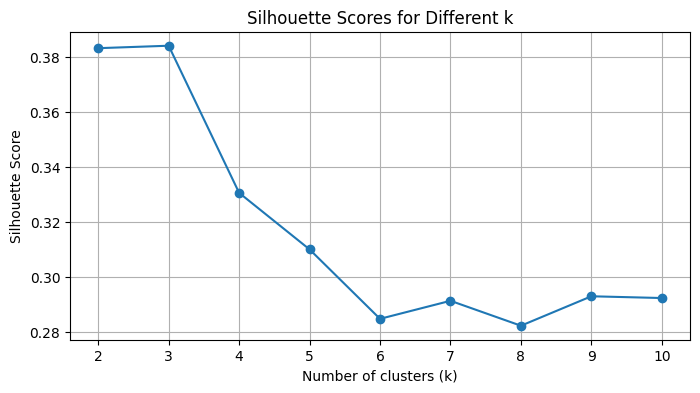

In [17]:
# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [18]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(new_data)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(new_data)

# Add to DataFrame
new_data['PCA1'] = pca_result[:, 0]
new_data['PCA2'] = pca_result[:, 1]

new_data['cluster'] = labels

/var/folders/28/pmh07v693dn2c3l0jdz5zvlw0000gn/T/ipykernel_19781/2875389309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['PCA1'] = pca_result[:, 0]
/var/folders/28/pmh07v693dn2c3l0jdz5zvlw0000gn/T/ipykernel_19781/2875389309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['PCA2'] = pca_result[:, 1]
/var/folders/28/pmh07v693dn2c3l0jdz5zvlw0000gn/T/ipykernel_19781/2875389309.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

/var/folders/28/pmh07v693dn2c3l0jdz5zvlw0000gn/T/ipykernel_19781/4262171896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['cluster'] = new_data['cluster'].astype(str)
/var/folders/28/pmh07v693dn2c3l0jdz5zvlw0000gn/T/ipykernel_19781/4262171896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['stroke'] = cp_dataframe['stroke']


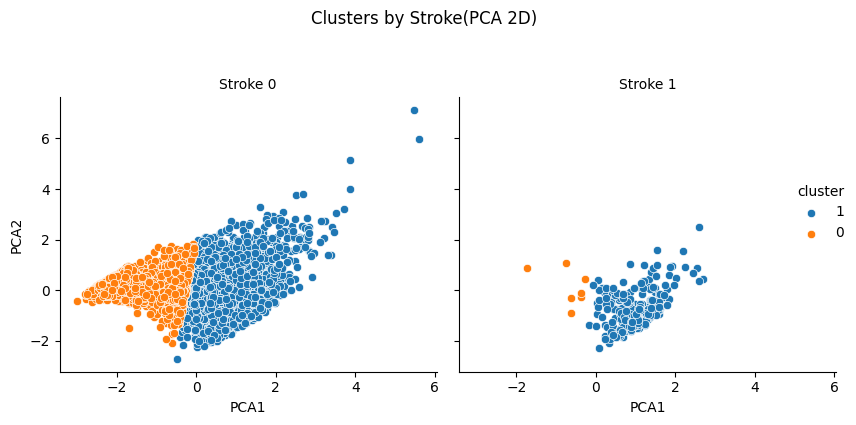

In [20]:
# Convert cluster labels to string for better legend display
new_data['cluster'] = new_data['cluster'].astype(str)
new_data['stroke'] = cp_dataframe['stroke']

g = sns.FacetGrid(new_data, col='stroke', hue='cluster', height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x='PCA1', y='PCA2')
g.add_legend()
g.set_titles(col_template="Stroke {col_name}")
plt.suptitle('Clusters by Stroke(PCA 2D)', y=1.05)
plt.tight_layout()
plt.show()

<Axes: xlabel='cluster', ylabel='bmi'>

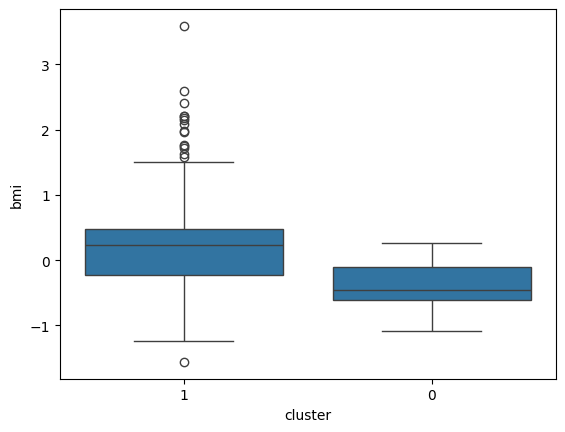

In [ ]:
sns.boxplot(x='cluster', y='bmi', data=new_data[new_data['stroke']==1])~


<Axes: xlabel='cluster', ylabel='age'>

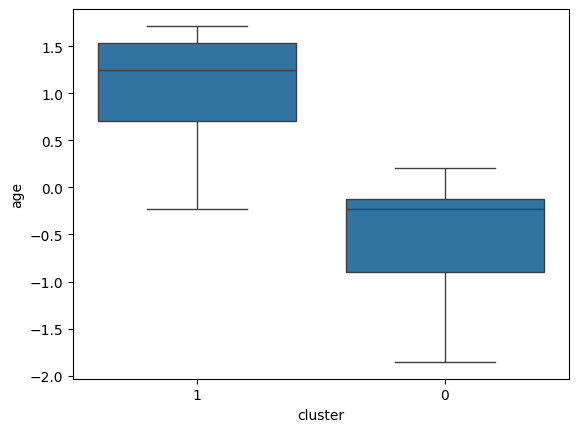

In [25]:
sns.boxplot(x='cluster', y='age', data=new_data[new_data['stroke']==1])

<Axes: xlabel='cluster', ylabel='avg_glucose_level'>

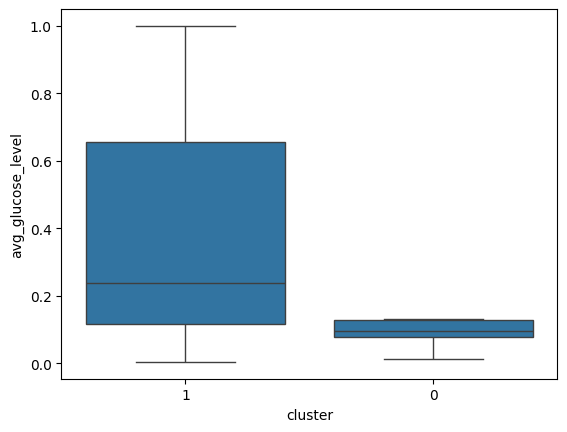

In [23]:
sns.boxplot(x='cluster', y='avg_glucose_level', data=new_data[new_data['stroke']==1])